In [91]:
import stablerank.srank as sr
import geometry_objects_2021 as ge


from ripser import ripser

import _pickle as pickle

import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.spatial as spatial

from scipy.spatial.distance import cdist, pdist, squareform

import scipy.stats as st


from timeit import default_timer as timer
from datetime import timedelta

from sklearn import svm
from sklearn.metrics import accuracy_score


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## Some Geometrical Objects

In [2]:
figures = []
distances = []
names = []
colors = {}

number_each_figures = 3

In [3]:
name = "circle"
color = "red"
colors[name] = color


number_points = 100
error = 1
for i in range(number_each_figures):
    names.append(name)
    fig = ge.circle([0,0], 4, number_points, error)
    figures.append(fig)
    
    d = squareform(pdist(fig, "euclidean"))
    distances.append(sr.Distance(d))
    

########################


name = "wedge_of_circles"
color = "blue"
colors[name] = color


number_points1 = 100
number_points2 = 120
error1 = 1
error2 = 0.6

for i in range(number_each_figures):
    names.append(name)
    circle_1 = ge.circle([0,0], 4, number_points1, error1)
    circle_2 = ge.circle([7,0], 3, number_points2, error2)
    fig = np.concatenate([circle_1, circle_2], axis=0)
    figures.append(fig)
    
    d = squareform(pdist(fig, "euclidean"))
    distances.append(sr.Distance(d))
    

#########################


name = "two_circles"
color = "yellow"
colors[name] = color


number_points1 = 100
number_points2 = 180
error1 = 0.8
error2 = 1.1
for i in range(number_each_figures):
    names.append(name)
    circle_1 = ge.circle([0,0], 4, number_points1, error1)
    circle_2 = ge.circle([0,0], 10, number_points2, error2)
    fig = np.concatenate([circle_1, circle_2], axis=0)
    figures.append(fig)
    
    d = squareform(pdist(fig, "euclidean"))
    distances.append(sr.Distance(d))
    
    
######################


name = "sphere"
color = "black"
colors[name] = color

r = 1
number_points = 1000
for i in range(number_each_figures):
    names.append(name)
    theta = np.random.uniform(0, 2*np.pi, number_points)
    z = np.random.uniform(-r, r, number_points)
    fig = np.zeros([number_points,3])
    for j in range (0,number_points):
        fig[j,2] = z[j]
        fig[j,0] = np.sqrt(np.abs(r*r - z[j]*z[j]))* np.cos(theta[j])
        fig[j,1] = np.sqrt(np.abs(r*r - z[j]*z[j]))* np.sin(theta[j])
    figures.append(fig)
    
    d = squareform(pdist(fig, "euclidean"))
    distances.append(sr.Distance(d))
    

#############################


name = "torus"
color = "brown"
colors[name] = color

number_points=1000
r = 1
b = 2
for i in range(number_each_figures):
    names.append(name)
    phi = np.random.uniform(0, 2*np.pi, number_points)
    theta = np.random.uniform(0, 2*np.pi, number_points)
    fig = np.zeros([number_points,3])

    for j in range (0,number_points):
        fig[j,2] = r*np.sin(theta[j])
        fig[j,0] = (r*np.cos(theta[j])+b)*np.cos(phi[j])
        fig[j,1] = (r*np.cos(theta[j])+b)*np.sin(phi[j])
    figures.append(fig)    
    
    d = squareform(pdist(fig, "euclidean"))
    distances.append(sr.Distance(d))

In [4]:
number_figures = len(figures)

In [5]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title(name)
    fig = figures[x]
    if fig.shape[1] ==2:
        plt.scatter(fig[:,0], fig[:,1])
    else:
        X = fig[:,0]
        Y = fig[:,1]
        Z = fig[:,2]
        #plt.figure(name, projection='3d', figsize=(10,10))
        plt.scatter(X,Y,Z, c = color) 



interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

## Basic Methods

<code> Distance.get_h0sr(sample=None, clustering_method="single", reduced=True)</code>

<code> Distance.get_bc(sample=None, maxdim=1, thresh=inf, coeff=2, reduced=True)</code>

<code> bc_to_sr(bar_code, degree="H1") <code>


h0sr:  <stablerank.rtorf.Pcnif object at 0x34909ce10>


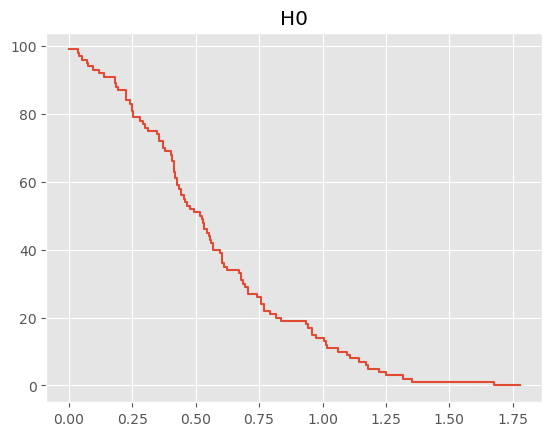

In [12]:
d = distances[0]
f0 = d.get_h0sr()
print("h0sr: ", f0)

plt.figure("H0")
plt.title("H0")
f0.plot()

bc:  {'H0': <stablerank.barcodes.BC object at 0x348f89990>, 'H1': <stablerank.barcodes.BC object at 0x34908fd50>, 'H2': <stablerank.barcodes.BC object at 0x34900b5d0>}
**********
b["H1"].bars: 
[[2.13812137 2.19560432]
 [1.58828127 4.82260942]
 [1.48456287 1.4850769 ]
 [1.44502759 1.63010299]
 [1.24538219 1.34402406]
 [1.23336601 1.2726692 ]
 [0.95606768 1.08029139]
 [0.8703602  0.87324542]
 [0.85854447 0.86281788]
 [0.82542533 0.86903971]]


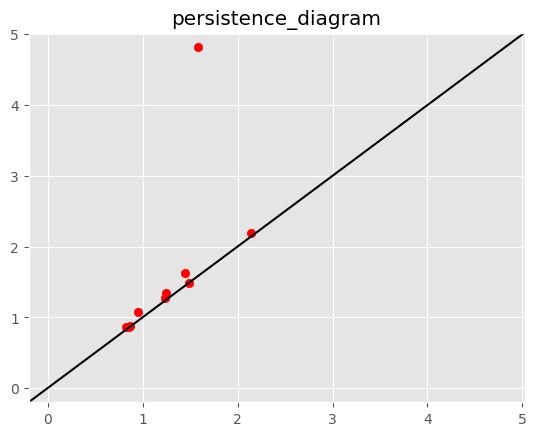

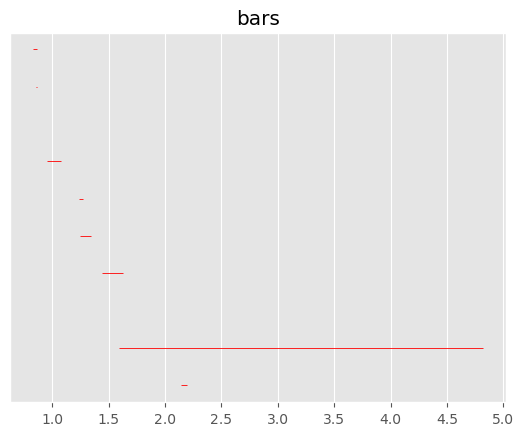

In [13]:
b = d.get_bc(maxdim=2, coeff=2)
print("bc: ", b)
print("*"*10)

print("""b["H1"].bars: """)
print(b["H1"].bars)

plt.figure("bc_persistence_diagram")
plt.title("persistence_diagram")
b["H1"].persistence_diagram()

plt.figure("bc_bars")
plt.title("bars")
b["H1"].plot()

f1:  <stablerank.rtorf.Pcnif object at 0x348f83610>
f2:  <stablerank.rtorf.Pcnif object at 0x3490a9710>


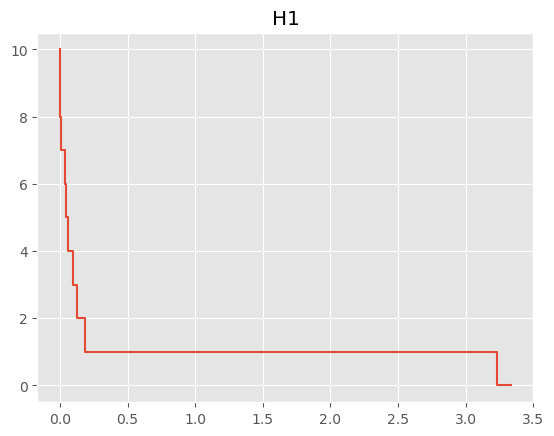

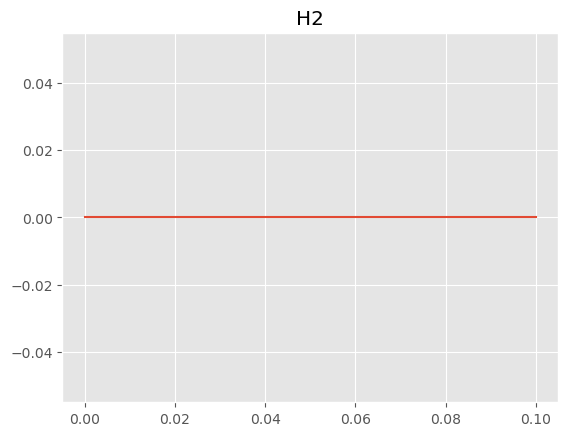

In [14]:
f1 = sr.bc_to_sr(b, "H1")
f2 = sr.bc_to_sr(b, "H2")

print("f1: ", f1)
plt.figure("H1")
plt.title("H1")
f1.plot()

print("f2: ", f2)
plt.figure("H2")
plt.title("H2")
f2.plot()

In [15]:
# H0
cm = "complete"

h0sr = []


start = timer()  
for d in distances:
    f = d.get_h0sr(clustering_method=cm)
    h0sr.append(f)
end = timer()
print("H0: ", timedelta(seconds=end-start))


# Bar codes 


maxdim = 2
bc = []

start = timer()  
for d in distances:
    b = d.get_bc(maxdim=maxdim)
    bc.append(b)
    
end = timer()
print("BC: ", timedelta(seconds=end-start))
  

#H1 H2

h1sr = []
h2sr = []

start = timer()  
for b in bc:
    h1sr.append(sr.bc_to_sr(b, degree="H1"))
    h2sr.append(sr.bc_to_sr(b, degree="H2") )
end = timer()
print("H1, H2: ", timedelta(seconds=end-start))
  

h1dim = []
h2dim = []

start = timer()  
for b in bc:
    h1dim.append(b["H1"].betti())
    h2dim.append(b["H2"].betti() )
end = timer()
print("H1, H2: ", timedelta(seconds=end-start))
  

H0:  0:00:00.053588
BC:  0:23:30.821835
H1, H2:  0:00:00.000523
H1, H2:  0:00:00.060439


# Plotting bar codes and stable ranks

In [49]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    #plt.figure(figsize=(5,5))
    plt.title("H0 "+name)
    bc[x]["H0"].persistence_diagram(finite_bars_color=color)
    plt.xlim([-0.5,6])  
    plt.ylim([0,6])  


interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

In [50]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title("H0 "+name)
    bc[x]["H0"].plot(color_finite_bars=color)
    plt.xlim([0,3])  


interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

In [58]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title("H0 "+name)
    h0sr[x].plot(color=color)
    plt.xlim([0,10])  


interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

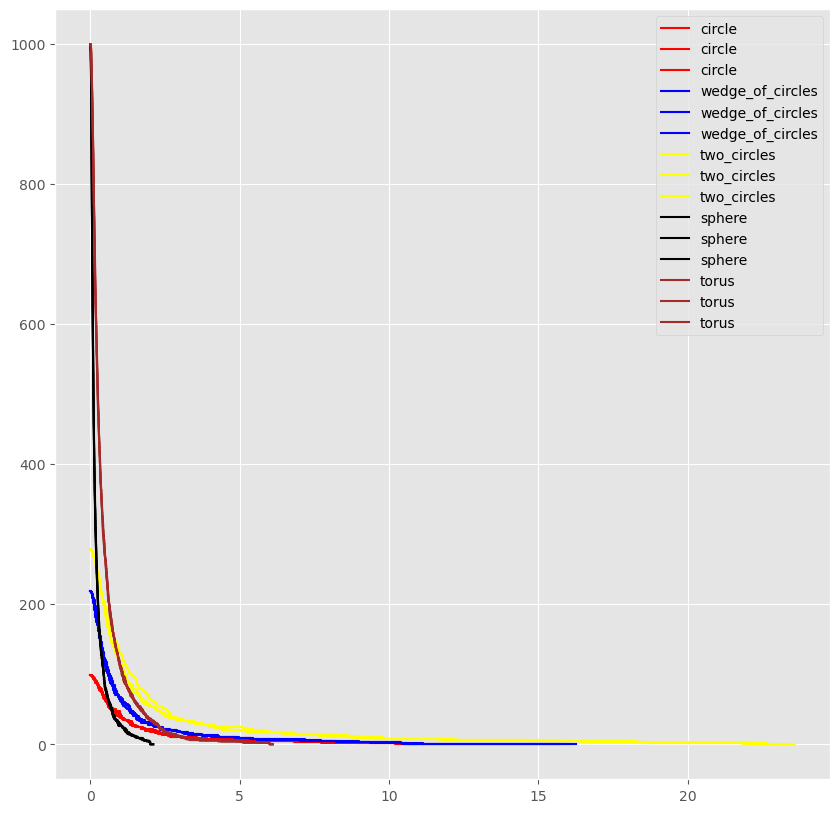

In [62]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h0sr[i]
    f.plot(color=color, label=name)
    plt.legend(loc="upper right")

In [51]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    #plt.figure(figsize=(5,5))
    plt.title("H1 "+name)
    bc[x]["H1"].persistence_diagram(finite_bars_color=color)
    plt.xlim([-0.5,6])  
    plt.ylim([0,6])  


interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

In [55]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title("H1 "+name)
    bc[x]["H1"].plot(color_finite_bars=color)
    plt.xlim([0,6])  


interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

In [60]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title("H1 "+name)
    h1sr[x].plot(color=color)
    plt.xlim([0,10])  

interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

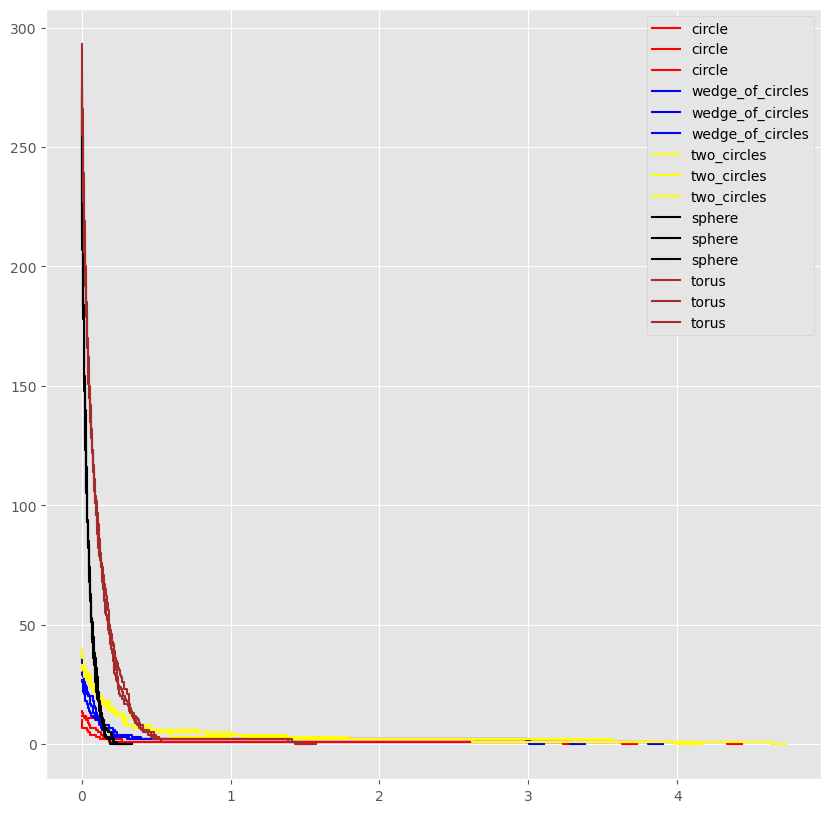

In [63]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h1sr[i]
    f.plot(color=color, label=name)
    plt.legend(loc="upper right")

In [66]:
@widgets.interact(x=(0, number_figures-1, 1))
def plot(x):
    name = names[x]
    color = colors[name]
    plt.figure(figsize=(5,5))
    plt.title("H0 "+name)
    h1dim[x].plot(color=color)
    plt.xlim([0,10])  

interactive(children=(IntSlider(value=7, description='x', max=14), Output()), _dom_classes=('widget-interact',…

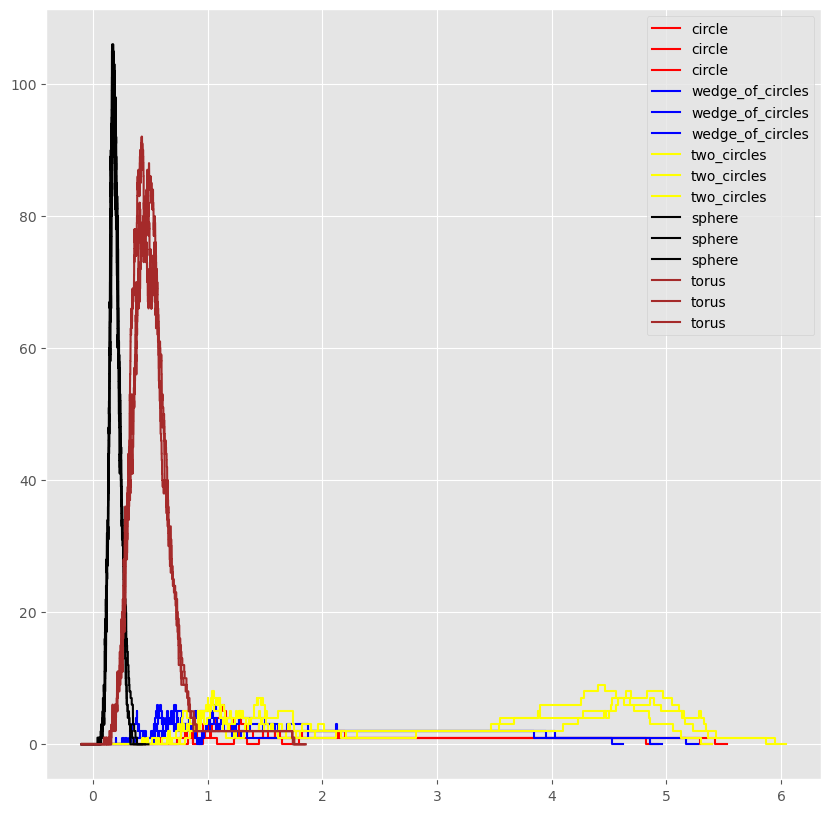

In [67]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h1dim[i]
    f.plot(color=color, label=name)
    plt.legend(loc="upper right")

# Averaged Stable Rank

<code> get_sample(number_instances, sample_size, probabilities) </code>

In [68]:
number_instances = 500
sample_size = 30

sample = []
for i in range(number_figures):
    prob = len(figures[i])
    sample.append(sr.get_sample(number_instances, sample_size, probabilities=prob))

In [69]:
# H0
cm = "complete"

h0sr_avg = []


start = timer() 
i = 0
for d in distances:
    s = sample[i]
    i += 1
    f = d.get_h0sr(sample=s, clustering_method=cm)
    h0sr_avg.append(f)
end = timer()
print("H0: ", timedelta(seconds=end-start))


# Bar codes 


maxdim = 2
bc_avg = []

start = timer()  
i = 0
for d in distances:
    s = sample[i]
    i += 1
    b = d.get_bc(sample=s, maxdim=maxdim)
    bc_avg.append(b)
    
end = timer()
print("BC: ", timedelta(seconds=end-start))
  

#H1 H2

h1sr_avg = []
h2sr_avg = []

start = timer()  
i = 0
for b in bc_avg:
    s = sample[i]
    i += 1
    h1sr_avg.append(sr.bc_to_sr(b, degree="H1"))
    h2sr_avg.append(sr.bc_to_sr(b, degree="H2") )
end = timer()
print("H1, H2: ", timedelta(seconds=end-start))
  


H0:  0:00:05.305165
BC:  0:00:04.374992
H1, H2:  0:00:01.219311


# Plotting averaged stable ranks

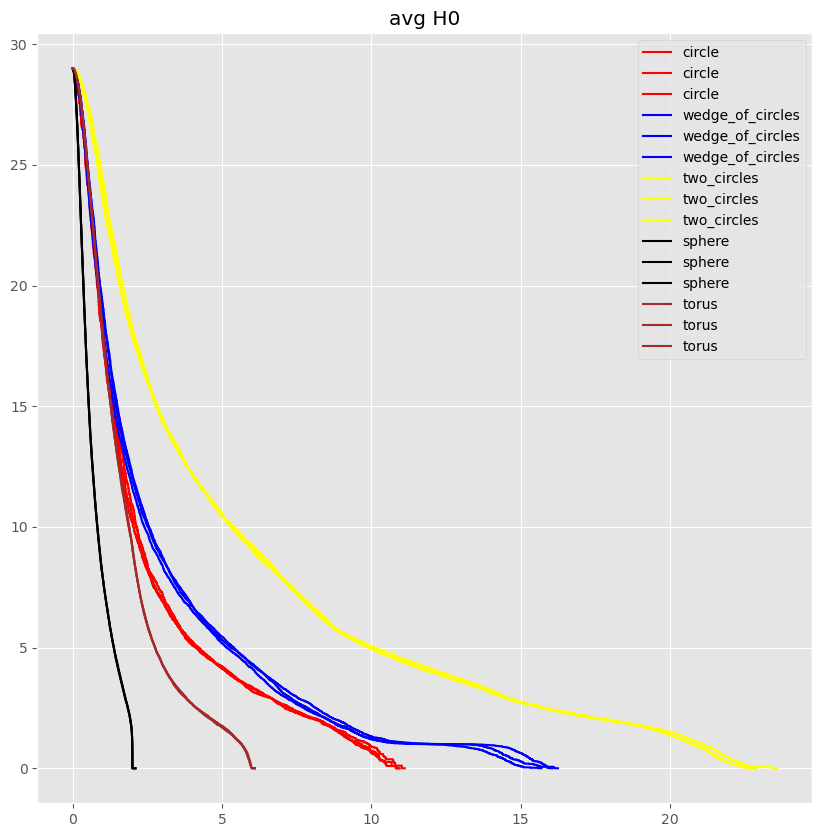

In [71]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h0sr_avg[i]
    f.plot(color=color, label=name)
    plt.title("avg H0")
    plt.legend(loc="upper right")

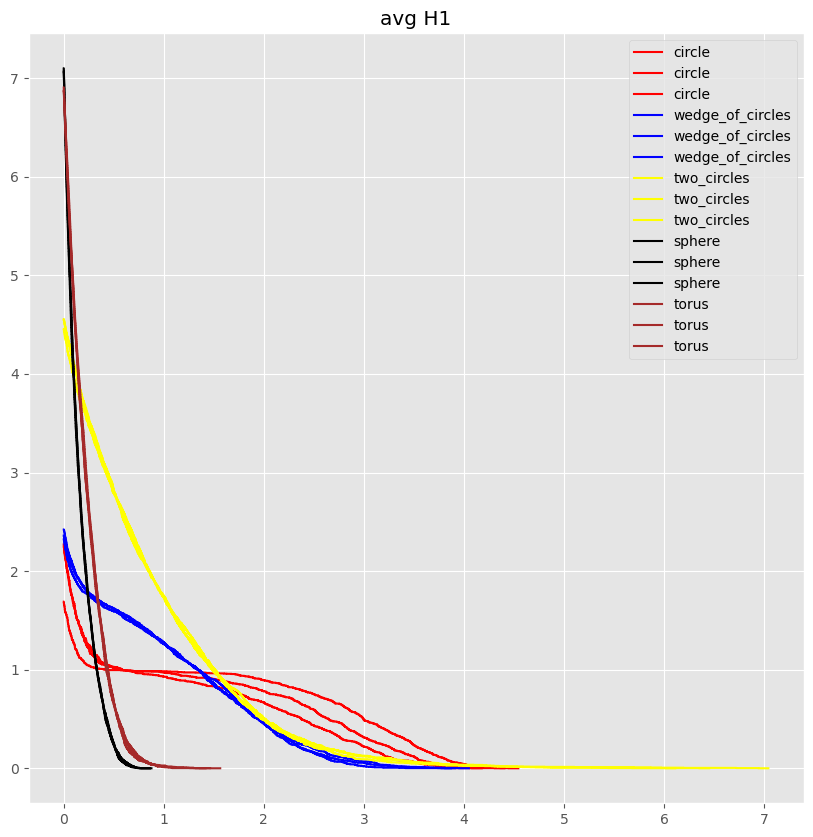

In [72]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h1sr_avg[i]
    f.plot(color=color, label=name)
    plt.title("avg H1")
    plt.legend(loc="upper right")

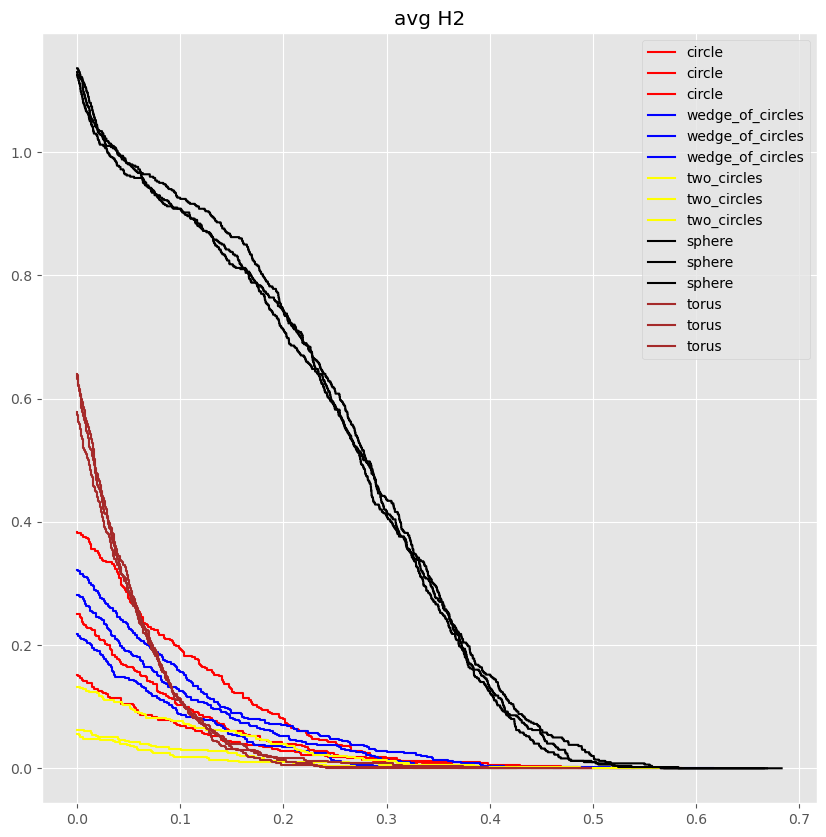

In [73]:
plt.figure(figsize=(10,10))
for i in range(len(distances)):
    name = names[i]
    color = colors[name]
    f = h2sr_avg[i]
    f.plot(color=color, label=name)
    plt.title("avg H2")
    plt.legend(loc="upper right")

## Choosing differant primes

In [81]:
d = distances[-1]

primes = [2,3,5,7,11]
b_different_primes = {} 
h1_different_primes = {}
h2_different_primes = {}

start = timer()  
for p in primes:
    b = d.get_bc(maxdim = 2, coeff=p)
    f = sr.bc_to_sr(b, degree="H1")
    g = sr.bc_to_sr(b, degree="H2")
    b_different_primes[p] = b
    h1_different_primes[p] = f
    h2_different_primes[p] = g

end = timer()
print(timedelta(seconds=end-start))

0:04:14.987839


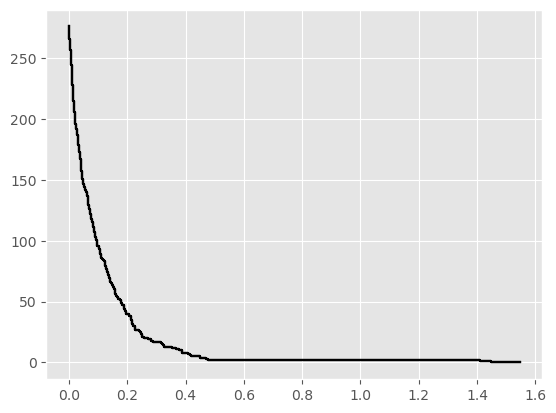

In [82]:
for p in primes:
    h1_different_primes[p].plot(color="black")

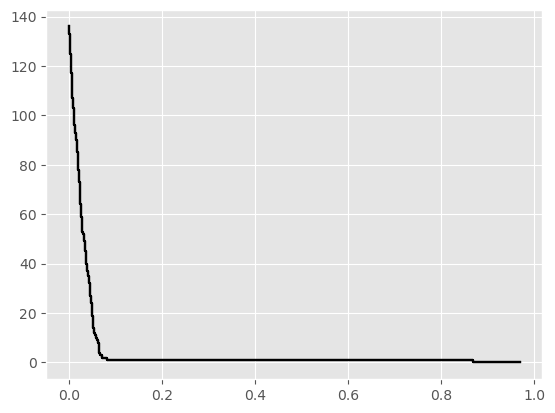

In [83]:
for p in primes:
    h2_different_primes[p].plot(color="black")

## A toy data set

In [152]:
data = []
i = 0
while i < 100:
    c = ge.circle([0,0], 1, 100, error=0.2)
    data.append(c)
    i += 1  
i = 0
while i < 100:
    s = ge.closed_path([[-0.9,-0.8],[0.8,-1],[0.8,0.7],[-0.7,1]], 100, error=0.2)
    data.append(s)
    i += 1  

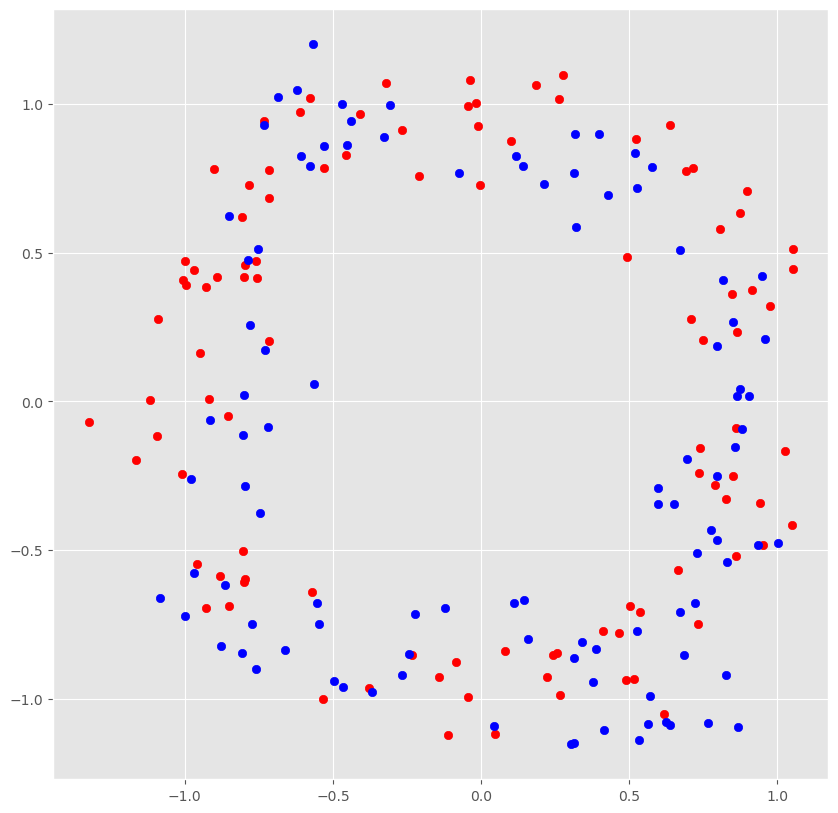

In [153]:
i = 57
j= 156
fig = plt.figure(figsize=(10,10))
plt.scatter(data[i][:,0],data[i][:,1], color="red")
plt.scatter(data[j][:,0],data[j][:,1], color="blue")


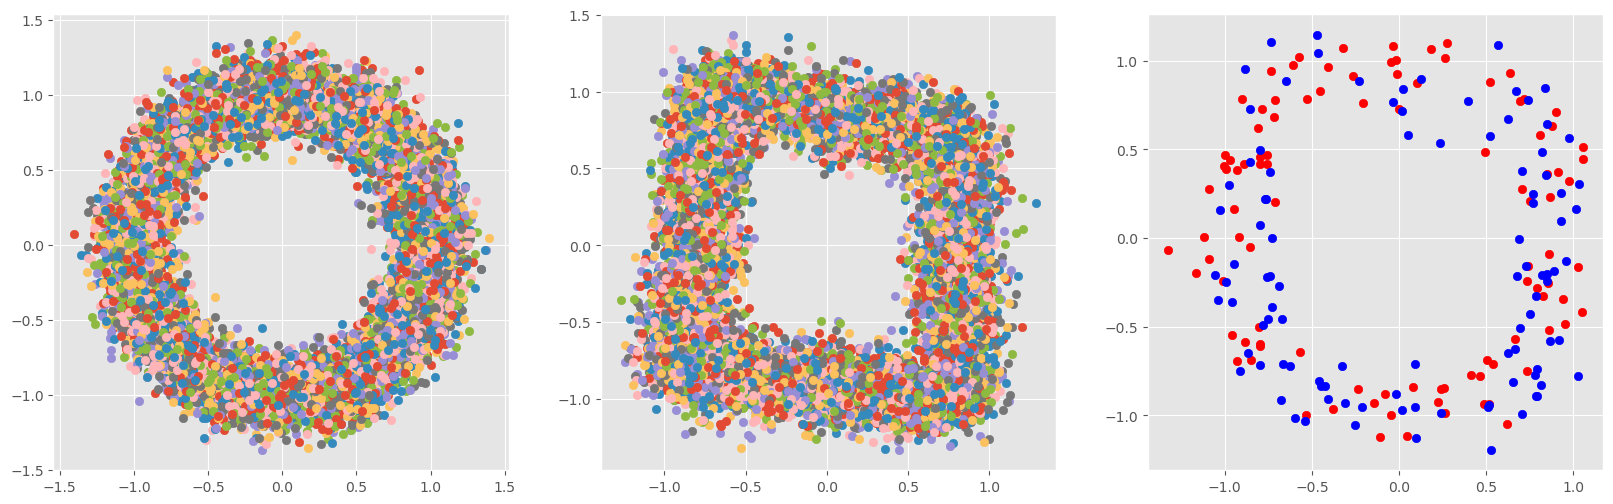

In [154]:
fig = plt.figure(figsize=(20,40))
axes = fig.subplots(1, 3) 
ax_left = axes[0]
ax_left.set_box_aspect(1)
i = 0
while i <100:
    ax_left.scatter(data[i][:,0],data[i][:,1])
    i += 1
    
ax_center = axes[1]
ax_center.set_box_aspect(1)
i = 100
while i <200:
    ax_center.scatter(data[i][:,0],data[i][:,1])
    i += 1

ax_right = axes[2]
ax_right.set_box_aspect(1) 
i = 57
j= 134
ax_right.scatter(data[i][:,0],data[i][:,1], color="red")
ax_right.scatter(data[j][:,0],data[j][:,1], color="blue")


In [155]:
train = []
i = 0
while i < 100:
    c = ge.circle([0,0], 1, 100, error=0.2)
    train.append(c)
    i += 1
i = 0
while i < 100:
    s = ge.closed_path([[-0.9,-0.8],[0.8,-1],[0.8,0.7],[-0.7,1]], 100, error=0.2)
    train.append(s)
    i += 1  
print(len(train))

200


## Fitting SVM

In [156]:
X = [d.flatten() for d in train]

zeros = np.zeros((100,), dtype=int)
ones= np.ones((100,), dtype=int)
y = np.concatenate([zeros,ones])


In [157]:
clf = svm.SVC()
clf.fit(X, y)

test = [d.flatten() for d in data]
pred = clf.predict(test)
a_score = accuracy_score(y, pred)
print(a_score)

0.595


In [158]:
print(pred)

[1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1]


In [159]:
X = [pdist(d) for d in train]
zeros = np.zeros((100,), dtype=int)
ones= np.ones((100,), dtype=int)
y = np.concatenate([zeros,ones])


In [160]:
clf = svm.SVC()
clf.fit(X, y)

test = [pdist(d) for d in data]
pred = clf.predict(test)
a_score = accuracy_score(y, pred)
print(a_score)

0.73


In [161]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1
 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0]


## Extracting H0 stable ranks

In [162]:
# Converitng the data into distance objects
data_dist = [sr.Distance(squareform(pdist(fig, "euclidean"))) for fig in data]
train_dist = [sr.Distance(squareform(pdist(fig, "euclidean"))) for fig in train]

In [163]:
# Converitng the distance objects into H0 stable ranks
clustering_methods = ["single", "complete", "average", "ward"]
data_h0sr = {}
train_h0sr = {}
for cm in clustering_methods:
    data_h0sr[cm] = [d.get_h0sr(clustering_method=cm) for d in data_dist]
    train_h0sr[cm] = [d.get_h0sr(clustering_method=cm) for d in train_dist]

## Here is the signal our H0 homology sense produces

In [165]:

@widgets.interact(x=(0, 3, 1))
def plot(x):
    cm = clustering_methods[x]
    plt.figure(figsize=(7,5))
    for i in range(100):
        f = data_h0sr[cm][i]
        g = data_h0sr[cm][100 + i]
        f.plot(color="red", linewidth=0.5)
        g.plot(color="blue", linewidth=0.5)
    plt.title(cm)

interactive(children=(IntSlider(value=1, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

## Let us use SVM as a computer inteligance

In [166]:
h0_kernel_train ={ }
h0_kernel_test ={ }
start = timer()    
for cm in clustering_methods:
    h0_kernel_train[cm] = np.asarray([[f.dot(g) for g in train_h0sr[cm]] for f in train_h0sr[cm]])
    h0_kernel_test[cm] = np.asarray([[f.dot(g) for g in train_h0sr[cm]] for f in data_h0sr[cm]])
end = timer()
print(timedelta(seconds=end-start))

0:00:19.562946


In [167]:
prediction = {}
a_score = {}
for cm in clustering_methods:
    clf = svm.SVC(kernel='precomputed')
    clf.fit(h0_kernel_train[cm], y)
    prediction[cm] = clf.predict(h0_kernel_test[cm])
    a_score[cm] = accuracy_score(y, prediction[cm])

In [168]:
for cm in clustering_methods:
    print(cm+": ", a_score[cm])

single:  0.545
complete:  0.905
average:  0.755
ward:  0.79


## Extracting H1 stable ranks

In [169]:
# Converitng the distance objects into bar_codes and stable ranks
start = timer()  
data_bc = [d.get_bc(maxdim=1) for d in  data_dist]

data_h1sr = [sr.bc_to_sr(bar_code, degree="H1") for bar_code in data_bc]
end = timer()

print(timedelta(seconds=end-start))

0:00:00.391492


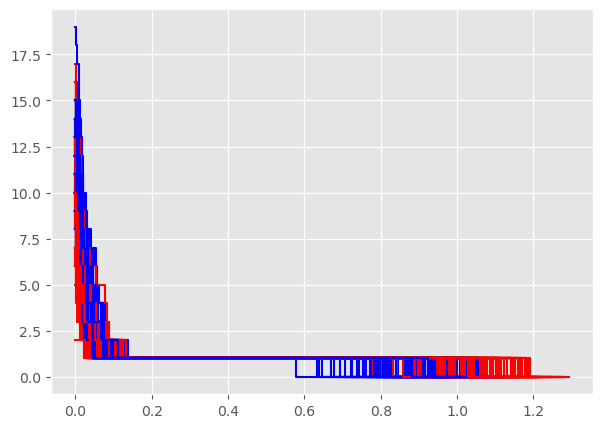

In [170]:
plt.figure(figsize=(7,5))

for i in range(100):
    f = data_h1sr[i]
    g = data_h1sr[100 + i]
    f.plot(color="red")
    g.plot(color="blue")

In [171]:
start = timer()  

train_bc = [d.get_bc(maxdim=1) for d in  train_dist]

train_h1sr = [sr.bc_to_sr(bar_code, degree="H1") for bar_code in train_bc]
end = timer()
print(timedelta(seconds=end-start))

0:00:00.400718


In [172]:

start = timer()    

h1_kernel_train = np.asarray([[f.dot(g) for g in train_h1sr] for f in train_h1sr])
h1_kernel_test = np.asarray([[f.dot(g) for g in train_h1sr] for f in data_h1sr])
end = timer()
print(timedelta(seconds=end-start))

0:00:03.269401


In [173]:
clf = svm.SVC(kernel='precomputed')
clf.fit(h1_kernel_train, y)
prediction = clf.predict(h1_kernel_test)
a_score = accuracy_score(y, prediction)

In [174]:
print(a_score)

0.83


# The case of noisy to data

In [236]:
data_noisy = []
data_noise_level =[]
noise = []
i = 0
while i < 100:
    n = np.random.randint(20, 40)
    data_noise_level.append(n)
    c = ge.circle([0,0], 1, 100-n, error=0.2)
    #_noise = ge.uniform_noise(-1.5, 1.5, -1.5, 1.5, n)
    _noise = ge.uniform_noise(-2.5, 2.5, -2.5, 2.5, n)
    noise.append(_noise)
    fig = np.concatenate([c, _noise], axis=0)
    data_noisy.append(fig)
    i += 1  
i = 0
while i < 100:
    n = np.random.randint(20, 40)
    data_noise_level.append(n)
    t = ge.closed_path([[-0.9,-0.8],[0.8,-1],[0.8,0.7],[-0.7,1]], 100-n, error=0.2)
    #_noise = ge.uniform_noise(-1.5, 1.5, -1.5, 1.5, n)
    _noise = ge.uniform_noise(-2.5, 2.5, -2.5, 2.5, n)
    noise.append(_noise)
    fig = np.concatenate([t, _noise], axis=0)
    data_noisy.append(fig)
    i += 1  

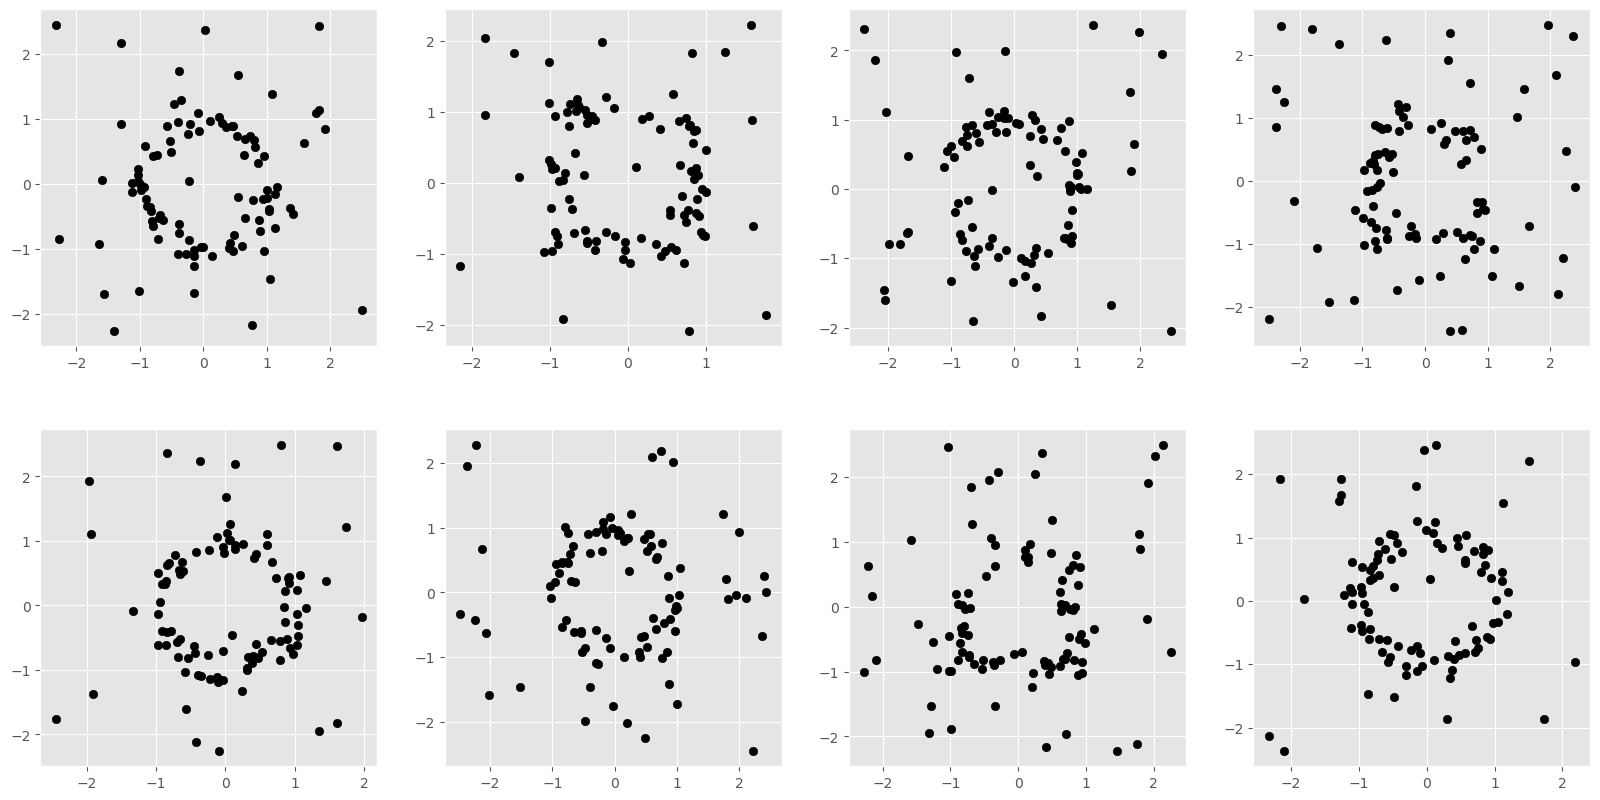

In [237]:
fig = plt.figure(figsize=(20,10))
axes = fig.subplots(2, 4) 
n = 6
ax = axes[0][0]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")

n=123
ax = axes[0][1]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")

n= 36
ax = axes[0][2]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")


n= 153
ax = axes[0][3]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")

n= 82
ax = axes[1][0]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")


n= 56
ax = axes[1][1]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")

n= 134
ax = axes[1][2]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")

n= 17
ax = axes[1][3]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")


fig.savefig('input_figures.png', bbox_inches='tight')

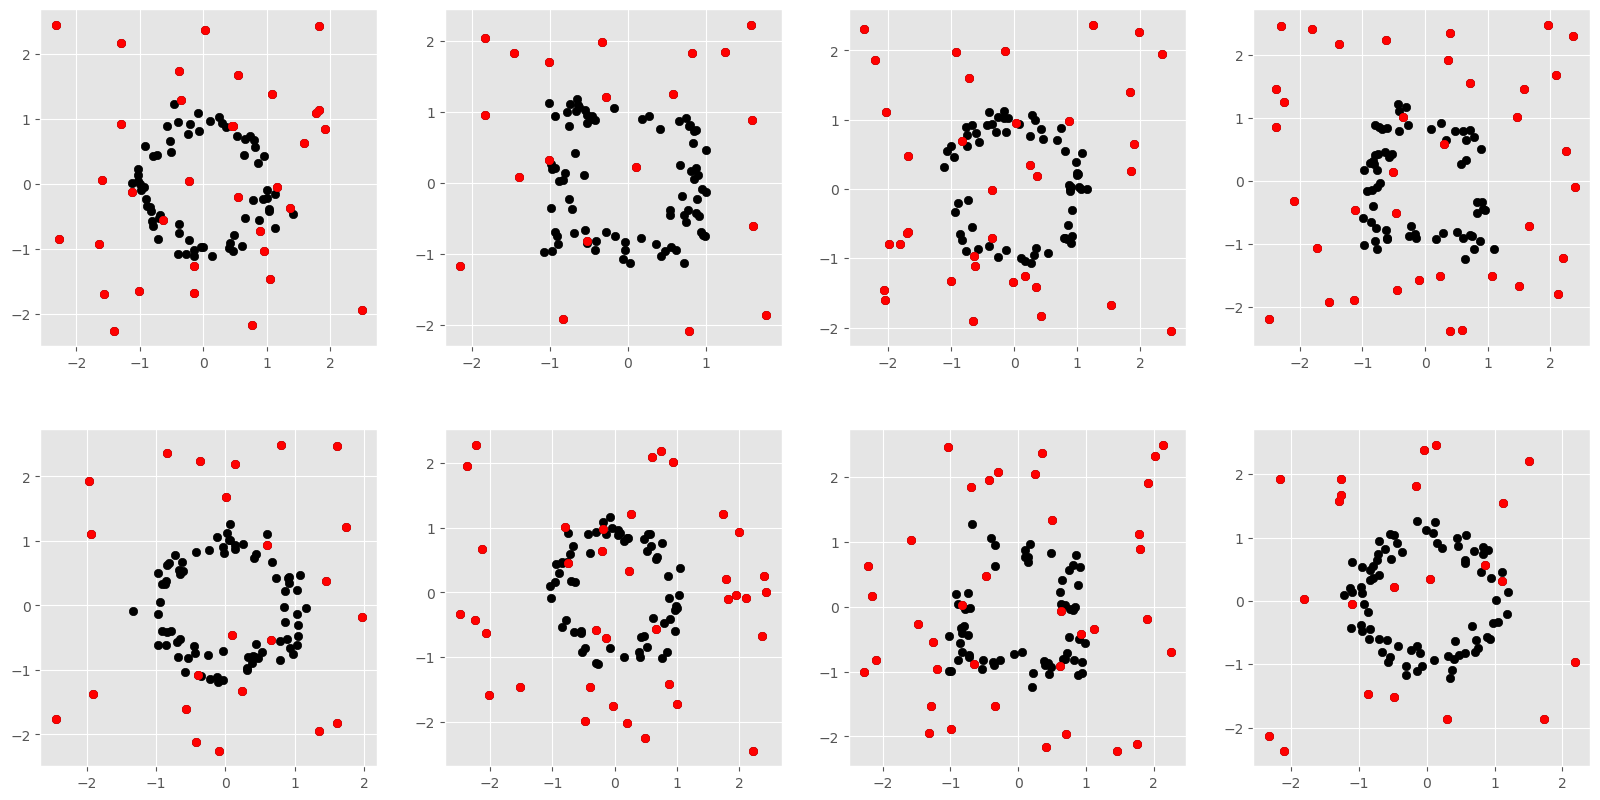

In [238]:
fig = plt.figure(figsize=(20,10))
axes = fig.subplots(2, 4) 
n = 6
ax = axes[0][0]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n=123
ax = axes[0][1]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 36
ax = axes[0][2]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 153
ax = axes[0][3]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 82
ax = axes[1][0]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 56
ax = axes[1][1]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 134
ax = axes[1][2]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")

n= 17
ax = axes[1][3]
ax.set_box_aspect(1)
ax.scatter(data_noisy[n][:,0],data_noisy[n][:,1], color="black")
ax.scatter(noise[n][:,0],noise[n][:,1], color="red")


fig.savefig('input_figures.png', bbox_inches='tight')

35
36


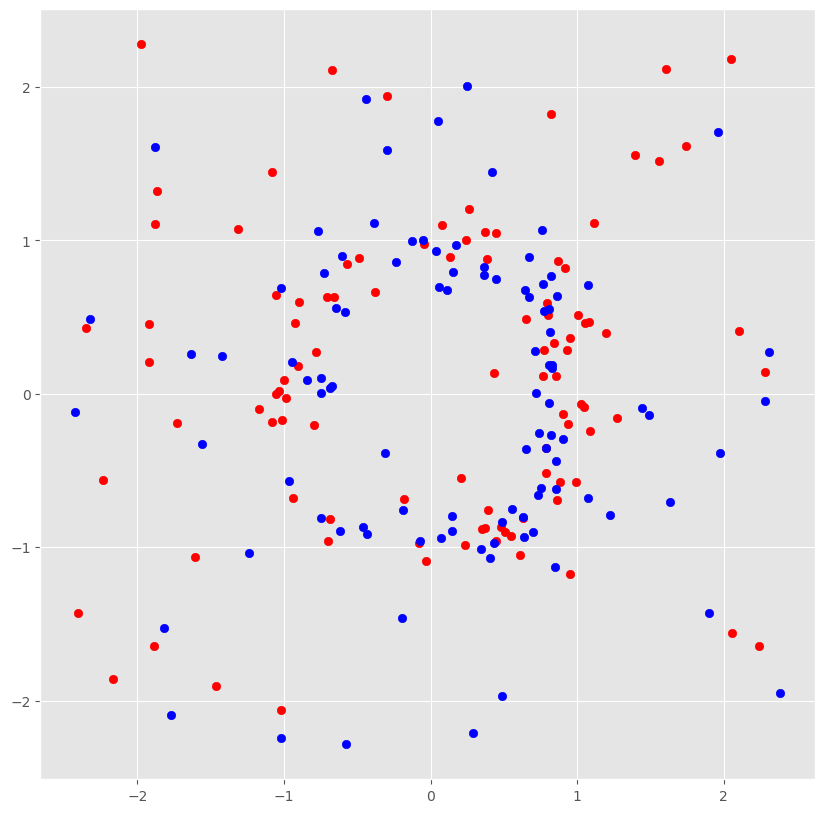

In [239]:
i = 59
print(data_noise_level[i])
j= 156
print(data_noise_level[j])
fig = plt.figure(figsize=(10,10))
plt.scatter(data_noisy[i][:,0],data_noisy[i][:,1], color="red")
plt.scatter(data_noisy[j][:,0],data_noisy[j][:,1], color="blue")

fig.savefig('input_figures_together.png', bbox_inches='tight')

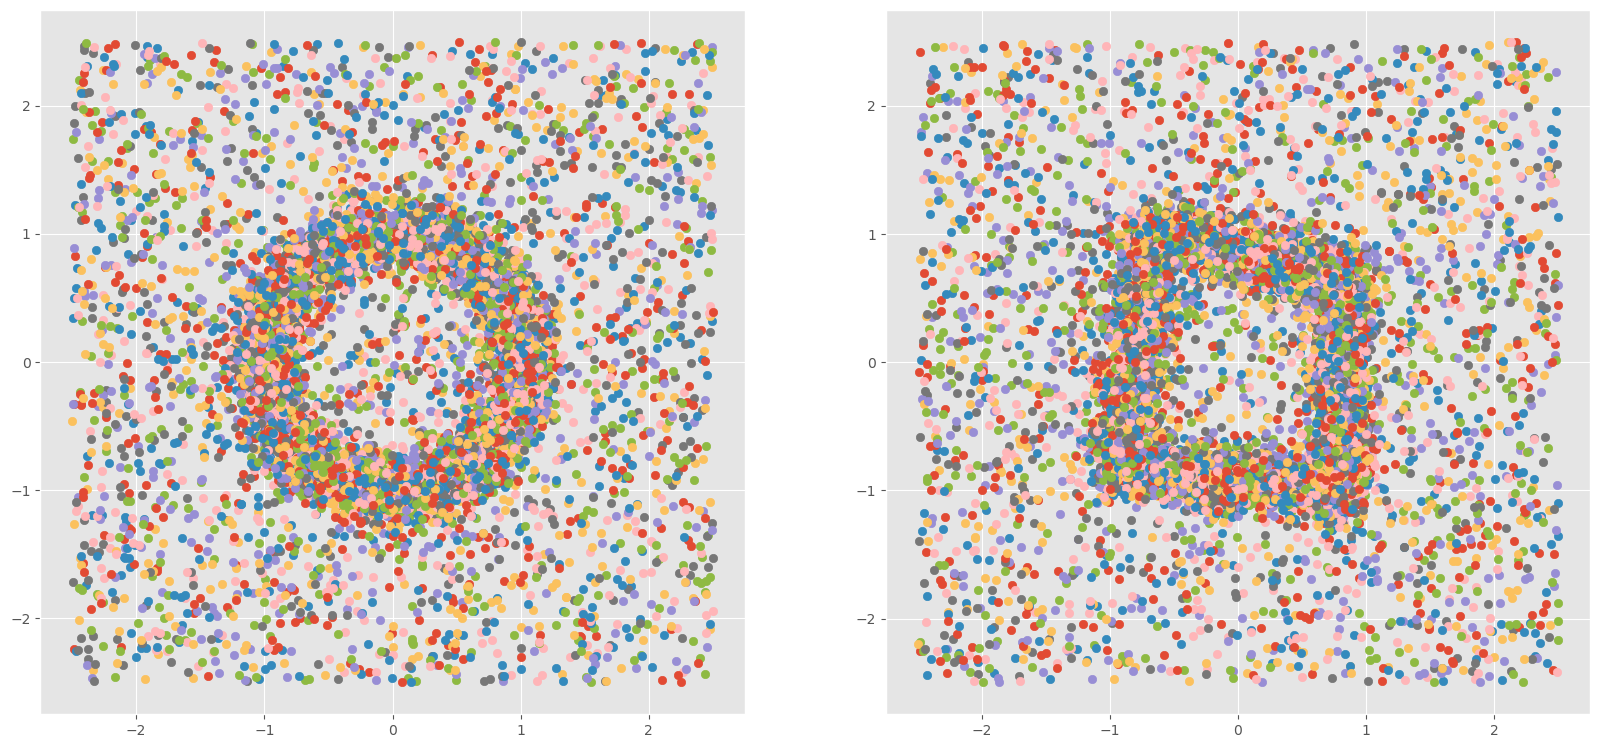

In [240]:
fig = plt.figure(figsize=(20,40))
axes = fig.subplots(1, 2) 
ax_left = axes[0]
ax_left.set_box_aspect(1)
i = 0
while i <100:
    ax_left.scatter(data_noisy[i][:,0],data_noisy[i][:,1])
    i += 1
    
ax_center = axes[1]
ax_center.set_box_aspect(1)
i = 100
while i <200:
    ax_center.scatter(data_noisy[i][:,0],data_noisy[i][:,1])
    i += 1



fig.savefig('all_input_figures.png', bbox_inches='tight')


In [241]:
train_noisy = []
train_noise_level =[]
i = 0
while i < 100:
    n = np.random.randint(20, 40)
    train_noise_level.append(n)
    c = ge.circle([0,0], 1, 100-n, error=0.2)
    #noise = ge.uniform_noise(-1.5, 1.5, -1.5, 1.5, n)
    noise = ge.uniform_noise(-2.5, 2.5, -2.5, 2.5, n)
    fig = np.concatenate([c,noise], axis=0)
    train_noisy.append(fig)
    i += 1  
i = 0
while i < 100:
    n = np.random.randint(20, 40)
    train_noise_level.append(n)
    t = ge.closed_path([[-0.9,-0.8],[0.8,-1],[0.8,0.7],[-0.7,1]], 100-n, error=0.2)
    #noise = ge.uniform_noise(-1.5, 1.5, -1.5, 1.5, n)
    noise = ge.uniform_noise(-2.5, 2.5, -2.5, 2.5, n)
    fig = np.concatenate([t,noise], axis=0)
    train_noisy.append(fig)
    i += 1  
    

## Let us use SVM as a computer inteligance

In [242]:
X = [pdist(d) for d in train]
zeros = np.zeros((100,), dtype=int)
ones= np.ones((100,), dtype=int)
y = np.concatenate([zeros,ones])


In [243]:
clf = svm.SVC()
clf.fit(X, y)

test = [pdist(d) for d in data_noisy]
pred = clf.predict(test)
a_score = accuracy_score(y, pred)
print(a_score)

0.5


In [244]:
# Converitng the data into distance objects
data_noisy_dist = [sr.Distance(squareform(pdist(fig, "euclidean"))) for fig in data_noisy]
train_noisy_dist = [sr.Distance(squareform(pdist(fig, "euclidean"))) for fig in train_noisy]

## Extracting H0 stable ranks

In [245]:
# Converitng the distance objects into H0 stable ranks
clustering_methods = ["single", "complete", "average", "ward"]
data_noisy_h0sr = {}
train_noisy_h0sr = {}
for cm in clustering_methods:
    data_noisy_h0sr[cm] = [d.get_h0sr(clustering_method=cm) for d in data_noisy_dist]
    train_noisy_h0sr[cm] = [d.get_h0sr(clustering_method=cm) for d in train_noisy_dist]

In [246]:
@widgets.interact(x=(0, 3, 1))
def plot(x):
    cm = clustering_methods[x]
    plt.figure(figsize=(7,5))
    for i in range(100):
        f = data_noisy_h0sr[cm][i]
        g = data_noisy_h0sr[cm][100 + i]
        f.plot(color="red", linewidth=0.5)
        g.plot(color="blue", linewidth=0.5)
    plt.title(cm)

interactive(children=(IntSlider(value=1, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

In [247]:
h0_kernel_train_noisy ={ }
h0_kernel_test_noisy ={ }
start = timer()    
for cm in clustering_methods:
    h0_kernel_train_noisy[cm] = np.asarray([[f.dot(g) for g in train_noisy_h0sr[cm]] for f in train_noisy_h0sr[cm]])
    h0_kernel_test_noisy[cm] = np.asarray([[f.dot(g) for g in train_noisy_h0sr[cm]] for f in data_noisy_h0sr[cm]])
end = timer()
print(timedelta(seconds=end-start))

0:00:19.620757


In [248]:
prediction = {}
a_score = {}
for cm in clustering_methods:
    clf = svm.SVC(kernel='precomputed')
    clf.fit(h0_kernel_train_noisy[cm], y)
    prediction[cm] = clf.predict(h0_kernel_test_noisy[cm])
    a_score[cm] = accuracy_score(y, prediction[cm])
    print(cm+": ", a_score[cm])

single:  0.425
complete:  0.545
average:  0.575
ward:  0.535


## Let us extract bar codes and higher homology stable ranks

In [249]:
# Converitng the distance objects into bar_codes and stable ranks
data_noisy_bc = [d.get_bc(maxdim=1) for d in  data_noisy_dist]

data_noisy_h1sr = [sr.bc_to_sr(bar_code, degree="H1") for bar_code in data_noisy_bc]

train_noisy_bc = [d.get_bc(maxdim=1) for d in  train_noisy_dist]

train_noisy_h1sr = [sr.bc_to_sr(bar_code, degree="H1") for bar_code in train_noisy_bc]

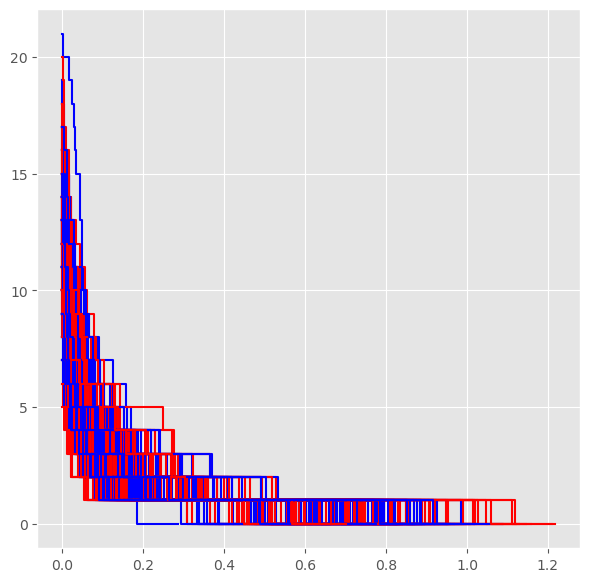

In [250]:
plt.figure(figsize=(7,7))

for i in range(100):
    f = data_noisy_h1sr[i]
    g = data_noisy_h1sr[100 + i]
    f.plot(color="red")
    g.plot(color="blue")

In [251]:
start = timer()    

h1_kernel_train_noisy = np.asarray([[f.dot(g) for g in train_noisy_h1sr] for f in train_noisy_h1sr])
h1_kernel_test_noisy = np.asarray([[f.dot(g) for g in train_noisy_h1sr] for f in data_noisy_h1sr])

end = timer()
print(timedelta(seconds=end-start))

0:00:03.265769


In [252]:
zeros = np.zeros((100,), dtype=int)
ones= np.ones((100,), dtype=int)
y = np.concatenate([zeros,ones])


clf = svm.SVC(kernel='precomputed')
clf.fit(h1_kernel_train_noisy, y)
prediction = clf.predict(h1_kernel_test_noisy)
a_score = accuracy_score(y, prediction)

In [253]:
print(a_score)

0.525


## Need to lower deviation!!!!!!! SAMPLING

In [254]:
number_instances = 7
sample_size = 5
n = 18
s = sr.get_sample(number_instances, sample_size, n)
print(s)
print(s.sample)

[[ 2  5  9 13 17]
 [ 6  7 10 11 16]
 [ 5  6 10 12 16]
 [ 2  3 12 13 14]
 [ 0  4  5 11 15]
 [ 0  9 13 15 16]
 [ 1  9 11 15 17]]


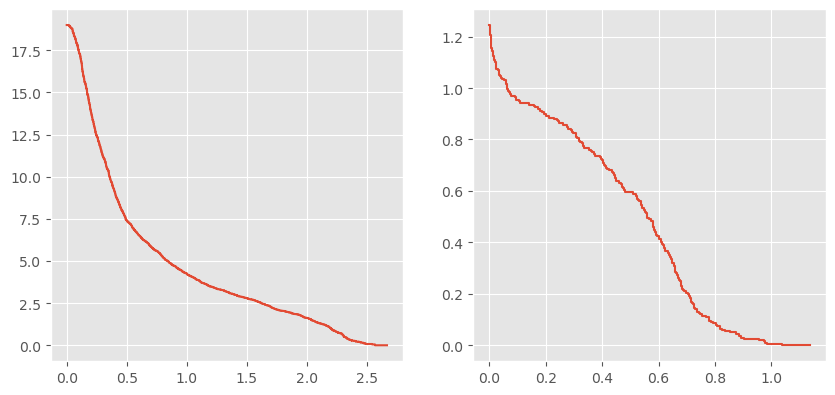

In [255]:
number_instances = 200
sample_size = 20

c = data[3]

d = squareform(pdist(c, "euclidean"))

# getting a distance object
c_dist = sr.Distance(d)


s = sr.get_sample(number_instances, sample_size, c_dist.size())

f = c_dist.get_h0sr(sample=s, clustering_method="complete")

b = c_dist.get_bc(sample=s)

g = sr.bc_to_sr(b, degree="H1")


fig = plt.figure(figsize=(10,20))
axes = fig.subplots(1, 2) 
ax_left = axes[0]
ax_left.set_box_aspect(1)
f.plot(ax=ax_left)

ax_right = axes[1]
ax_right.set_box_aspect(1)
g.plot(ax=ax_right)

In [256]:
# Converitng the distance objects into H0 stable ranks
number_instances = 300
sample_size = 20

clustering_methods = ["single", "complete", "average", "ward"]
data_noisy_h0sr_avg = {}
train_noisy_h0sr_avg = {}
start = timer()    
for cm in clustering_methods:
    data_noisy_h0sr_avg[cm] = []
    train_noisy_h0sr_avg[cm] = []
    for d in  data_noisy_dist:
        s = sr.get_sample(number_instances, sample_size, d.size())
        f = d.get_h0sr(sample=s, clustering_method=cm)
        data_noisy_h0sr_avg[cm].append(f)
    for d in train_noisy_dist:
        s = sr.get_sample(number_instances, sample_size,  d.size())
        g = d.get_h0sr(sample=s, clustering_method=cm)
        train_noisy_h0sr_avg[cm].append(g)
end = timer()
print(timedelta(seconds=end-start))

0:02:06.304927


In [257]:
@widgets.interact(x=(0, 3, 1))
def plot(x):
    cm = clustering_methods[x]
    plt.figure(figsize=(7,5))
    for i in range(100):
        f = data_noisy_h0sr_avg[cm][i]
        g = data_noisy_h0sr_avg[cm][100 + i]
        f.plot(color="red", linewidth=0.5)
        g.plot(color="blue", linewidth=0.5)
    plt.title(cm)

interactive(children=(IntSlider(value=1, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

In [258]:
h0_kernel_train_noisy_avg ={ }
h0_kernel_test_noisy_avg ={ }
start = timer()    
for cm in clustering_methods:
    h0_kernel_train_noisy_avg[cm] = np.asarray([[f.dot(g) for g in train_noisy_h0sr_avg[cm]] for f in train_noisy_h0sr_avg[cm]])
    h0_kernel_test_noisy_avg[cm] = np.asarray([[f.dot(g) for g in train_noisy_h0sr_avg[cm]] for f in data_noisy_h0sr_avg[cm]])
end = timer()
print(timedelta(seconds=end-start))

0:05:41.811493


In [259]:
prediction = {}
a_score = {}
for cm in clustering_methods:
    clf = svm.SVC(kernel='precomputed')
    clf.fit(h0_kernel_train_noisy_avg[cm], y)
    prediction[cm] = clf.predict(h0_kernel_test_noisy_avg[cm])
    a_score[cm] = accuracy_score(y, prediction[cm])
    print(cm+": ", a_score[cm])

single:  0.575
complete:  0.615
average:  0.625
ward:  0.6


In [260]:
number_instances = 300
sample_size = 20

data_noisy_h1sr_avg = []
train_noisy_h1sr_avg = []

for d in  data_noisy_dist:
    s = sr.get_sample(number_instances, sample_size, d.size())
    b = d.get_bc(sample=s)
    f = sr.bc_to_sr(b, degree="H1")
    data_noisy_h1sr_avg.append(f)
for d in  train_noisy_dist:
    s = sr.get_sample(number_instances, sample_size, d.size())
    b = d.get_bc(sample=s)
    f = sr.bc_to_sr(b, degree="H1")
    train_noisy_h1sr_avg.append(f)

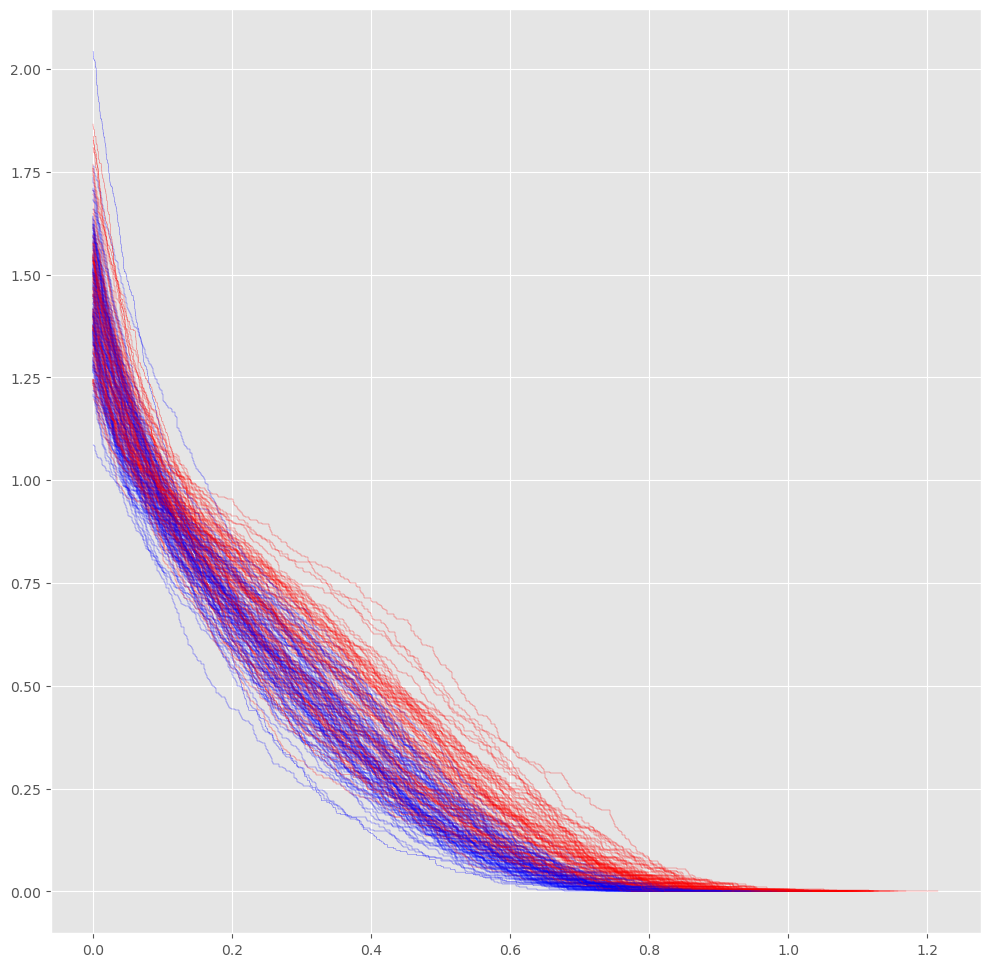

In [261]:
plt.figure(figsize=(12,12))
for i in range(100):
    f = data_noisy_h1sr_avg[i]
    f.plot(color="red", linewidth=0.2)
    g = data_noisy_h1sr_avg[100 + i]
    g.plot(color="blue", linewidth=0.2)


In [262]:
h1_kernel_train = np.asarray([[f.dot(g) for g in train_noisy_h1sr_avg] for f in train_noisy_h1sr_avg])
h1_kernel_test = np.asarray([[f.dot(g) for g in train_noisy_h1sr_avg] for f in data_noisy_h1sr_avg])
clf = svm.SVC(kernel='precomputed') 
clf.fit(h1_kernel_train, y)
prediction = clf.predict(h1_kernel_test)
a_score = accuracy_score(y, prediction)    
print(a_score)

0.71
